### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [295]:
data = pd.read_csv('data/coupons.csv')

In [296]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [298]:
# Let's take a look at the value counts for the car column
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [299]:
# Drop the car column entirely since the vast majority of rows do not have a value - this is not useful for analysis
data.drop(columns=['car'], inplace=True)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [300]:
# Decision is to drop all other rows where there any NaNs.  
# There are not too many here so we don't lose much data, so safe to do so.  
# You could fill in user attribute values that are missing with '0' but decided it could skew analysis.   
# We are left with 12079 of the original 12684 rows
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [301]:
# Filter on acceptance and divide by total number of rows
# Approximately 57% of total observations choose to accept the coupon
prop_accept = data.query('Y == 1').shape[0] / data.shape[0]
prop_accept

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count by Coupon')

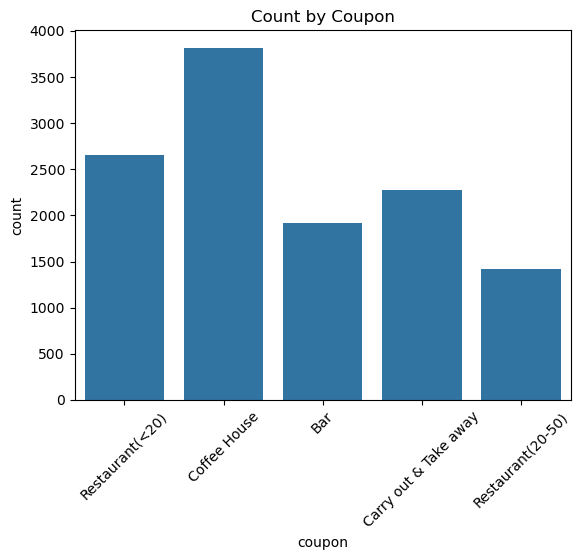

In [302]:
# Discovered two ways to do this
# One is the countplot which is a type of barplot
# Second one is the conventional barplot where you group by coupon and use the group data frame
# Both plots are identical
sns.countplot(x='coupon', data=data)
plt.xticks(rotation=45)
plt.title('Count by Coupon')

Text(0.5, 1.0, 'Count by Coupon')

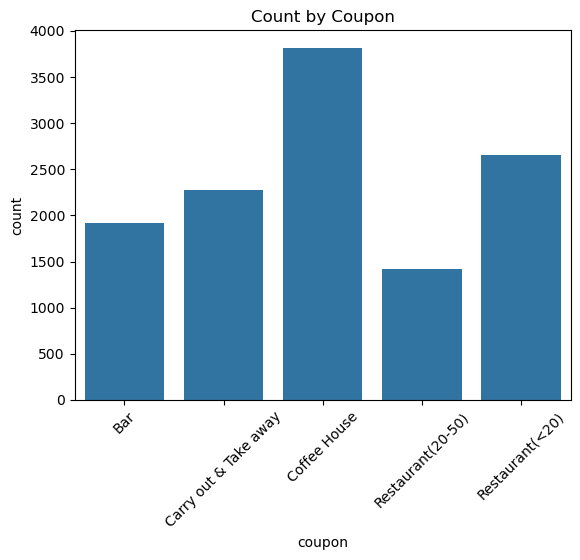

In [303]:
# Also can use straight barplot
data_group = data.groupby('coupon').size()
grouped_counts_df = data_group.reset_index(name='count')

sns.barplot(x='coupon', y='count', data=grouped_counts_df)
plt.xticks(rotation=45)
plt.title('Count by Coupon')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature When Coupons Were Sent')

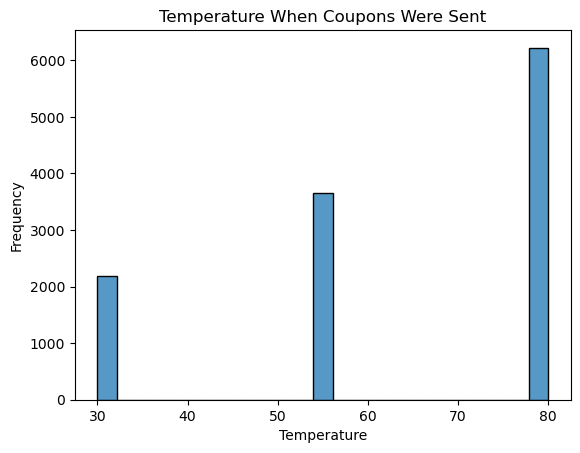

In [304]:
# Create a histogram
sns.histplot(data['temperature'])

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature When Coupons Were Sent')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [305]:
df_bar = data.query('coupon == "Bar"').reset_index()
df_bar.head()

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
2,39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
3,46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
4,57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [306]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1913 non-null   int64 
 1   destination           1913 non-null   object
 2   passanger             1913 non-null   object
 3   weather               1913 non-null   object
 4   temperature           1913 non-null   int64 
 5   time                  1913 non-null   object
 6   coupon                1913 non-null   object
 7   expiration            1913 non-null   object
 8   gender                1913 non-null   object
 9   age                   1913 non-null   object
 10  maritalStatus         1913 non-null   object
 11  has_children          1913 non-null   int64 
 12  education             1913 non-null   object
 13  occupation            1913 non-null   object
 14  income                1913 non-null   object
 15  Bar                   1913 non-null   

In [307]:
# 41% of bar coupons were accepted
bar_prop_accept = df_bar.query('Y == 1').shape[0] / df_bar.shape[0]
bar_prop_accept

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [308]:
df_bar['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [309]:
# 37% of those who went to bar 3 or fewer times a month accepted
cat_freq = ['4~8', 'gt8'] 
threeOrMore_ratio = df_bar.query('Bar not in @cat_freq and Y == 1').shape[0] / df_bar.query('Bar not in @cat_freq').shape[0]
threeOrMore_ratio

0.37267441860465117

In [310]:
# 76% of those who went to bar more than 3 times a month accepted
more_ratio = df_bar.query('Bar in @cat_freq and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq').shape[0]
more_ratio

0.7616580310880829

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [311]:
df_bar['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [312]:
# 69% acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
cat_freq = ['1~3', '4~8', 'gt8'] 
cat_age = ['21', 'below21']
over25_ratio = df_bar.query('Bar in @cat_freq and age not in @cat_age and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq and age not in @cat_age').shape[0]
over25_ratio

0.6898263027295285

In [313]:
# 67% acceptance rate for drivers who go bar more than once a month and are under the age of 25
everyone_else_ratio = df_bar.query('Bar in @cat_freq and age in @cat_age and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq and age in @cat_age').shape[0]
everyone_else_ratio

0.6745562130177515

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [314]:
df_bar['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [315]:
df_bar['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [316]:
# 71% drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
cat_freq = ['1~3', '4~8', 'gt8'] 

ratio = df_bar.query('Bar in @cat_freq and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry" and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"').shape[0]
ratio

0.7094339622641509

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [317]:
df_bar['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

In [318]:
# 71% go to bars more than once a month, had passengers that were not a kid, and were not widowed
cat_freq = ['1~3', '4~8', 'gt8'] 
#cat_age_over30 = ['31', '36', '41', '46', '50plus'] 
cat_age = ['26', '21', 'below21']

ratio1 = df_bar.query('Bar in @cat_freq and passanger != "Kid(s)" and maritalStatus != "Widowed" and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq and passanger != "Kid(s)" and maritalStatus != "Widowed"').shape[0]
ratio1

0.7094339622641509

In [319]:
# 72% go to bars more than once a month and are under the age of 30
ratio2 = df_bar.query('Bar in @cat_freq and age in @cat_age and Y == 1').shape[0] / df_bar.query('Bar in @cat_freq and age in @cat_age').shape[0]
ratio2

0.7195121951219512

In [320]:
df_bar['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

In [321]:
df_bar['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [322]:
# 44% go to cheap restaurants more than 4 times a month and income is less than 50K.
cat_income_less50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'] 

ratio3 = df_bar.query('RestaurantLessThan20 != "1~3" and income in @cat_income_less50 and Y == 1').shape[0] / df_bar.query('RestaurantLessThan20 != "1~3" and income in @cat_income_less50').shape[0]
ratio3

0.43856332703213613

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [323]:
# There is a baseline of 41% of bar coupons that are accepted. 
# It is clear that those patrons who go often (more than 3 times a month) accept coupons at a higher rate (76% vs 37%)
# Regarding age, there is no real difference in acceptance rate - under 25 and over 25 have similar acceptance rates (67% and 69%)
# Those whose passengers were not children also have a higher acceptance rate in the 70% range
# Finally, financial situation is not a driver as bar coupons are not accepted that much more (44%) over the baseline for those who frequent cheap restaurants with lower incomes

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [324]:
df_coffee = data.query('coupon == "Coffee House"').reset_index()
df_coffee.head()

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
1,26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
3,28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [325]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3816 non-null   int64 
 1   destination           3816 non-null   object
 2   passanger             3816 non-null   object
 3   weather               3816 non-null   object
 4   temperature           3816 non-null   int64 
 5   time                  3816 non-null   object
 6   coupon                3816 non-null   object
 7   expiration            3816 non-null   object
 8   gender                3816 non-null   object
 9   age                   3816 non-null   object
 10  maritalStatus         3816 non-null   object
 11  has_children          3816 non-null   int64 
 12  education             3816 non-null   object
 13  occupation            3816 non-null   object
 14  income                3816 non-null   object
 15  Bar                   3816 non-null   

In [340]:
df_coffee.describe()

,index,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3816.000000,3816.000000,3816.000000,3816.0,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,5282.275681,68.096174,0.381551,1.0,0.519392,0.078092,0.187631,0.812369,0.496331
std,3258.815131,15.934365,0.485831,0.0,0.499689,0.268352,0.390468,0.390468,0.500052
min,23.000000,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2570.000000,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5035.500000,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7626.000000,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,12681.000000,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [326]:
# For those who drink coffee at least once a month, almost 66% of all Coffee coupons were accepted
cat_freq = ['1~3', '4~8', 'gt8'] 
coffee_prop_accept = df_coffee.query('CoffeeHouse in @cat_freq and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq').shape[0]
coffee_prop_accept

0.6589935760171306

In [327]:
df_coffee['time'].value_counts()

time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: count, dtype: int64

Text(0.5, 1.0, 'Coffee Coupon Response by Time of Day')

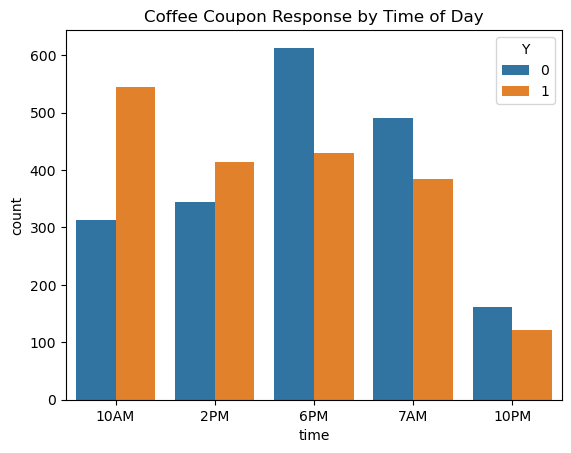

In [328]:
# Bar plot that shows time of day does impact coupon acceptance rate
sns.countplot(x='time', data=df_coffee, hue='Y')
plt.title('Coffee Coupon Response by Time of Day')

In [329]:
# 81% acceptance rate when coupon is received at 10AM - 7AM is too early
cat_freq = ['1~3', '4~8', 'gt8'] 
cat_time = ['10AM'] 
ratio = df_coffee.query('CoffeeHouse in @cat_freq and time in @cat_time and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and time in @cat_time').shape[0]
ratio

0.8109452736318408

In [330]:
df_coffee['destination'].value_counts()

destination
No Urgent Place    2053
Home                888
Work                875
Name: count, dtype: int64

Text(0.5, 1.0, 'Coffee Coupon Response by Drive Destination')

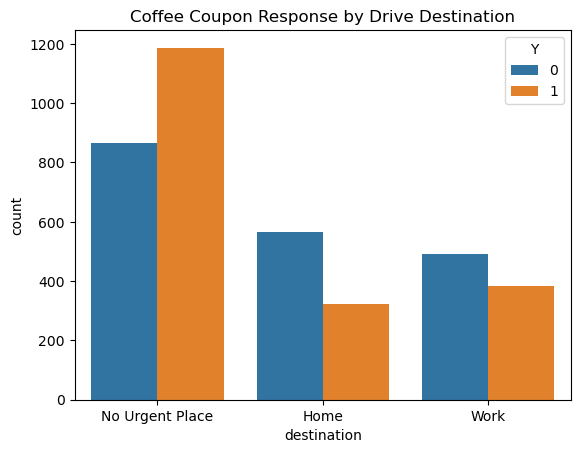

In [331]:
# Surprisingly, morning coffee does not correlate with coupon acceptance, instead coupons accepted at higher rate when urgency is not factor
sns.countplot(x='destination', data=df_coffee, hue='Y')
plt.title('Coffee Coupon Response by Drive Destination')

In [332]:
# 74% acceptance rate for coffee drinkers who are not going anywhere urgent
cat_freq = ['1~3', '4~8', 'gt8'] 
ratio = df_coffee.query('CoffeeHouse in @cat_freq and destination == "No Urgent Place" and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and destination == "No Urgent Place"').shape[0]
ratio

0.7398212512413108

In [333]:
df_coffee['direction_same'].value_counts()

direction_same
0    3100
1     716
Name: count, dtype: int64

In [334]:
# Direction does have a measurable impact on acceptance rate for coffee drinkers at 73%
ratio = df_coffee.query('CoffeeHouse in @cat_freq and direction_same == 1 and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and direction_same == 1').shape[0]
ratio

0.7294117647058823

In [335]:
ratio = df_coffee.query('CoffeeHouse in @cat_freq and direction_same == 0 and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and direction_same == 0').shape[0]
ratio

0.643324607329843

In [336]:
df_coffee['temperature'].value_counts()

temperature
80    2298
55    1219
30     299
Name: count, dtype: int64

In [337]:
# Hotter temperatures also drive coupon usage - iced coffee perhaps ? 
ratio = df_coffee.query('CoffeeHouse in @cat_freq and temperature == 80 and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and temperature == 80').shape[0]
ratio

0.714027149321267

In [338]:
ratio = df_coffee.query('CoffeeHouse in @cat_freq and temperature != 80 and Y == 1').shape[0] / df_coffee.query('CoffeeHouse in @cat_freq and temperature != 80').shape[0]
ratio

0.5792922673656619

In [ ]:
# Summary of findings:
# For those who drink coffee at least once a month, almost 66% of all Coffee coupons were accepted
# 81% acceptance rate when coupon is received at 10AM - 7AM is too early and doesn't move the needle!
# Surprisingly, morning coffee does not correlate with coupon acceptance, instead coupons accepted at higher rate when urgency is not factor (74%)
# Direction does have a measurable impact on acceptance rate for coffee drinkers at 73% when venue is in the same direction
# Hotter temperatures also drive coupon usage at 71% - iced coffee and speciality drinks perhaps ?